In [1]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
# Sklearn packages for evaluation, modeling and preformance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
#Keras packages relating to Deep Learning Architecture
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
# Visualizes all the columns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
pip install imblearn --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

In [57]:
#Read the kepler dataset
exop = pd.read_csv('keplerm.csv')

# Select top of the dataset
exop.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,2.470613,1.900000e-08,-1.900000e-08,122.763301,0.000006,-0.000006,0.8186,0.0003,-0.0006,1.74259,0.00089,-0.00089,14186.4,46.7,-46.7,12.85,0.27,-0.27,1344.0,NaN,NaN,772.22,60.74,-57.15,6802.0,1.0,q1_q16_tce,5850.0,50.0,-50.0,4.455,0.025,-0.025,0.950,0.020,-0.020,286.80847,49.316399,11.338
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,2.204735,3.800000e-08,-3.800000e-08,121.358572,0.000014,-0.000014,0.0010,0.0111,-0.0010,3.88216,0.00044,-0.00044,6690.6,1.3,-1.3,16.39,0.15,-0.14,2025.0,NaN,NaN,3973.70,279.95,-264.48,6714.5,1.0,q1_q16_tce,6350.0,80.0,-80.0,4.021,0.011,-0.011,1.991,0.018,-0.018,292.24728,47.969521,10.463
2,6678383,K00111.02,Kepler-104 c,CONFIRMED,CANDIDATE,NaN,0,0,0,0,23.668364,2.980000e-05,-2.980000e-05,132.713660,0.001040,-0.001040,0.6309,0.0393,-0.4485,5.78180,0.04330,-0.04330,458.3,4.5,-4.5,3.06,0.50,-0.69,763.0,NaN,NaN,80.07,37.94,-34.43,110.4,3.0,q1_q16_tce,5755.0,119.0,-78.0,4.081,0.213,-0.115,1.361,0.225,-0.305,287.60461,42.166779,12.596
3,6922244,K00010.01,Kepler-8 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,3.522499,1.940000e-07,-1.940000e-07,121.119429,0.000046,-0.000046,0.6141,0.0061,-0.0094,3.19061,0.00633,-0.00633,9379.3,6.6,-6.6,14.83,1.19,-1.32,1521.0,NaN,NaN,1264.67,323.37,-317.46,1801.5,1.0,q1_q16_tce,6225.0,114.0,-158.0,4.169,0.055,-0.048,1.451,0.117,-0.129,281.28812,42.451080,13.563
4,9873254,K00717.01,Kepler-653 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,14.707490,3.760000e-05,-3.760000e-05,175.792850,0.001900,-0.001900,0.0167,0.4454,-0.0166,3.15840,0.06130,-0.06130,265.7,8.2,-8.2,1.75,0.40,-0.15,753.0,NaN,NaN,76.11,46.93,-18.02,36.6,1.0,q1_q16_tce,5665.0,105.0,-127.0,4.391,0.065,-0.167,1.095,0.247,-0.094,282.21292,46.717819,13.387


In [58]:
#Checking the size of the data
num_rows, num_columns = exop.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

#Checking for the datatype of the metro dataset

print(type(exop))

Number of rows: 7348
Number of columns: 49
<class 'pandas.core.frame.DataFrame'>


In [61]:
new_headers_name = ["KepID", 
                    "KOI Name", 
                    "Kepler Name", 
                    "Exoplanet Archive Disposition", 
                    "Disposition Using Kepler Data", 
                    "Disposition Score", 
                    "Not Transit-Like False Positive Flag",
                    "Stellar Eclipse False Positive Flag", 
                    "Centroid Offset False Positive Flag", 
                    "Ephemeris Match Indicates Contamination False Positive Flag", 
                    "Orbital Period in days", 
                    "Orbital Period Upper Unc.", 
                    "Orbital Period Lower Unc.", 
                    "Transit Epoch [BKJD]", 
                    "Transit Epoch Upper Unc. [BKJD]", 
                    "Transit Epoch Lower Unc. [BKJD]", 
                    "Impact Parameter", 
                    "Impact Parameter Upper Unc.", 
                    "Impact Parameter Lower Unc.", 
                    "Transit Duration [hrs]", 
                    "Transit Duration Upper Unc. [hrs]", 
                    "Transit Duration Lower Unc. [hrs]", 
                    "Transit Depth [ppm]", 
                    "Transit Depth Upper Unc. [ppm]", 
                    "Transit Depth Lower Unc. [ppm]", 
                    "Planetary Radius [Earth radii]",
                    "Planetary Radius Upper Unc. [Earth radii]", 
                    "Planetary Radius Lower Unc. [Earth radii]", 
                    "Equilibrium Temperature [K]", 
                    "Equilibrium Temperature Upper Unc. [K]", 
                    "Equilibrium Temperature Lower Unc. [K]",
                    "Insolation Flux [Earth flux]", 
                    "Insolation Flux Upper Unc. [Earth flux]", 
                    "Insolation Flux Lower Unc. [Earth flux]",
                    "Transit Signal-to-Noise", 
                    "TCE Planet Number", 
                    "TCE Delivery", 
                    "Stellar Effective Temperature [K]", 
                    "Stellar Effective Temperature Upper Unc. [K]", 
                    "Stellar Effective Temperature Lower Unc. [K]", 
                    "Stellar Surface Gravity [log10(cm/s**2)]", 
                    "Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]", 
                    "Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]", 
                    "Stellar Radius [Solar radii]", 
                    "Stellar Radius Upper Unc. [Solar radii]", 
                    "Stellar Radius Lower Unc. [Solar radii]", 
                    "RA [decimal degrees]", 
                    "Dec [decimal degrees]", 
                    "Kepler-band [mag]"]

# Assign the new header names to the DataFrame
exop.columns = new_headers_name

In [62]:
exop.head()

,KepID,KOI Name,Kepler Name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Disposition Score,Not Transit-Like False Positive Flag,Stellar Eclipse False Positive Flag,Centroid Offset False Positive Flag,Ephemeris Match Indicates Contamination False Positive Flag,Orbital Period in days,Orbital Period Upper Unc.,Orbital Period Lower Unc.,Transit Epoch [BKJD],Transit Epoch Upper Unc. [BKJD],Transit Epoch Lower Unc. [BKJD],Impact Parameter,Impact Parameter Upper Unc.,Impact Parameter Lower Unc.,Transit Duration [hrs],Transit Duration Upper Unc. [hrs],Transit Duration Lower Unc. [hrs],Transit Depth [ppm],Transit Depth Upper Unc. [ppm],Transit Depth Lower Unc. [ppm],Planetary Radius [Earth radii],Planetary Radius Upper Unc. [Earth radii],Planetary Radius Lower Unc. [Earth radii],Equilibrium Temperature [K],Equilibrium Temperature Upper Unc. [K],Equilibrium Temperature Lower Unc. [K],Insolation Flux [Earth flux],Insolation Flux Upper Unc. [Earth flux],Insolation Flux Lower Unc. [Earth flux],Transit Signal-to-Noise,TCE Planet Number,TCE Delivery,Stellar Effective Temperature [K],Stellar Effective Temperature Upper Unc. [K],Stellar Effective Temperature Lower Unc. [K],Stellar Surface Gravity [log10(cm/s**2)],Stellar Surface Gravity Upper Unc. [log10(cm/s**2)],Stellar Surface Gravity Lower Unc. [log10(cm/s**2)],Stellar Radius [Solar radii],Stellar Radius Upper Unc. [Solar radii],Stellar Radius Lower Unc. [Solar radii],RA [decimal degrees],Dec [decimal degrees],Kepler-band [mag]
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,2.470613,1.900000e-08,-1.900000e-08,122.763301,0.000006,-0.000006,0.8186,0.0003,-0.0006,1.74259,0.00089,-0.00089,14186.4,46.7,-46.7,12.85,0.27,-0.27,1344.0,NaN,NaN,772.22,60.74,-57.15,6802.0,1.0,q1_q16_tce,5850.0,50.0,-50.0,4.455,0.025,-0.025,0.950,0.020,-0.020,286.80847,49.316399,11.338
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,2.204735,3.800000e-08,-3.800000e-08,121.358572,0.000014,-0.000014,0.0010,0.0111,-0.0010,3.88216,0.00044,-0.00044,6690.6,1.3,-1.3,16.39,0.15,-0.14,2025.0,NaN,NaN,3973.70,279.95,-264.48,6714.5,1.0,q1_q16_tce,6350.0,80.0,-80.0,4.021,0.011,-0.011,1.991,0.018,-0.018,292.24728,47.969521,10.463
2,6678383,K00111.02,Kepler-104 c,CONFIRMED,CANDIDATE,NaN,0,0,0,0,23.668364,2.980000e-05,-2.980000e-05,132.713660,0.001040,-0.001040,0.6309,0.0393,-0.4485,5.78180,0.04330,-0.04330,458.3,4.5,-4.5,3.06,0.50,-0.69,763.0,NaN,NaN,80.07,37.94,-34.43,110.4,3.0,q1_q16_tce,5755.0,119.0,-78.0,4.081,0.213,-0.115,1.361,0.225,-0.305,287.60461,42.166779,12.596
3,6922244,K00010.01,Kepler-8 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,3.522499,1.940000e-07,-1.940000e-07,121.119429,0.000046,-0.000046,0.6141,0.0061,-0.0094,3.19061,0.00633,-0.00633,9379.3,6.6,-6.6,14.83,1.19,-1.32,1521.0,NaN,NaN,1264.67,323.37,-317.46,1801.5,1.0,q1_q16_tce,6225.0,114.0,-158.0,4.169,0.055,-0.048,1.451,0.117,-0.129,281.28812,42.451080,13.563
4,9873254,K00717.01,Kepler-653 b,CONFIRMED,NOT DISPOSITIONED,NaN,0,0,0,0,14.707490,3.760000e-05,-3.760000e-05,175.792850,0.001900,-0.001900,0.0167,0.4454,-0.0166,3.15840,0.06130,-0.06130,265.7,8.2,-8.2,1.75,0.40,-0.15,753.0,NaN,NaN,76.11,46.93,-18.02,36.6,1.0,q1_q16_tce,5665.0,105.0,-127.0,4.391,0.065,-0.167,1.095,0.247,-0.094,282.21292,46.717819,13.387


In [63]:
# Check the data types of the columns using d.types attribute

exop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7348 entries, 0 to 7347
Data columns (total 49 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   KepID                                                        7348 non-null   int64  
 1   KOI Name                                                     7348 non-null   object 
 2   Kepler Name                                                  2663 non-null   object 
 3   Exoplanet Archive Disposition                                7348 non-null   object 
 4   Disposition Using Kepler Data                                7348 non-null   object 
 5   Disposition Score                                            0 non-null      float64
 6   Not Transit-Like False Positive Flag                         7348 non-null   int64  
 7   Stellar Eclipse False Positive Flag                          7348 non-null   i

In [10]:
# Identify missing values
missing = exop.isnull()

# Count the number of missing values in each column
missing_count = missing.sum()

# Display the missing values and their count
print(missing_count)

# Calculate the percentage of rows with missing values in the dataset
percentage = exop.isnull().any(axis=1).mean().round(4) * 100

# Print the percentage of rows with missing values
print(percentage)

KepID                                                             0
KOI Name                                                          0
Kepler Name                                                    4685
Exoplanet Archive Disposition                                     0
Disposition Using Kepler Data                                     0
Disposition Score                                              7348
Not Transit-Like False Positive Flag                              0
Stellar Eclipse False Positive Flag                               0
Centroid Offset False Positive Flag                               0
Ephemeris Match Indicates Contamination False Positive Flag       0
Orbital Period in days                                            0
Orbital Period Upper Unc.                                       284
Orbital Period Lower Unc.                                       284
Transit Epoch [BKJD]                                              0
Transit Epoch Upper Unc. [BKJD]                 

In [11]:
# Calculate the percentage of missing values per column
percentage1 = exop.isna().mean() * 100

# Print the percentage of missing values per column
print(percentage1)

KepID                                                            0.000000
KOI Name                                                         0.000000
Kepler Name                                                     63.758846
Exoplanet Archive Disposition                                    0.000000
Disposition Using Kepler Data                                    0.000000
Disposition Score                                              100.000000
Not Transit-Like False Positive Flag                             0.000000
Stellar Eclipse False Positive Flag                              0.000000
Centroid Offset False Positive Flag                              0.000000
Ephemeris Match Indicates Contamination False Positive Flag      0.000000
Orbital Period in days                                           0.000000
Orbital Period Upper Unc.                                        3.864997
Orbital Period Lower Unc.                                        3.864997
Transit Epoch [BKJD]                  

In [12]:
exop['Candidate ExopStatus'] = exop['Disposition Using Kepler Data'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

In [13]:
#We will be dropping null-columns and irrelevant columns

columns_to_drop_1 = ['KepID', 'KOI Name', 'Kepler Name', 
                     'Disposition Score', 'Equilibrium Temperature Lower Unc. [K]', 
                     'Equilibrium Temperature Upper Unc. [K]', 'TCE Delivery', 'Disposition Using Kepler Data']
exop = exop.drop(columns_to_drop_1, axis=1)

#Lastly, we will drop the 'Exoplanet Archive Disposition' since we're interested in 'Disposition Using Kepler Data'

exop = exop.drop(['Exoplanet Archive Disposition'], axis=1)

In [14]:
#Convert object columns into integer datatypes
exop['Not Transit-Like False Positive Flag'] = exop['Not Transit-Like False Positive Flag'].astype(int)
exop['Stellar Eclipse False Positive Flag'] = exop['Stellar Eclipse False Positive Flag'].astype(int)
exop['Centroid Offset False Positive Flag'] = exop['Centroid Offset False Positive Flag'].astype(int)
exop['Ephemeris Match Indicates Contamination False Positive Flag'] = exop['Ephemeris Match Indicates Contamination False Positive Flag'].astype(int)

In [15]:
#Drop missing values
exop.dropna(inplace=True)
# Display the number of rows and columns after dropping the missing values
print(f'After dropping missing values: {exop.shape[0]} rows, {exop.shape[1]} columns')

After dropping missing values: 6073 rows, 41 columns


In [16]:
# Check the data types of the columns using d.types attribute after cleansing

exop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6073 entries, 0 to 7347
Data columns (total 41 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Not Transit-Like False Positive Flag                         6073 non-null   int32  
 1   Stellar Eclipse False Positive Flag                          6073 non-null   int32  
 2   Centroid Offset False Positive Flag                          6073 non-null   int32  
 3   Ephemeris Match Indicates Contamination False Positive Flag  6073 non-null   int32  
 4   Orbital Period in days                                       6073 non-null   float64
 5   Orbital Period Upper Unc.                                    6073 non-null   float64
 6   Orbital Period Lower Unc.                                    6073 non-null   float64
 7   Transit Epoch [BKJD]                                         6073 non-null   f

In [17]:
exop

,Not Transit-Like False Positive Flag,Stellar Eclipse False Positive Flag,Centroid Offset False Positive Flag,Ephemeris Match Indicates Contamination False Positive Flag,Orbital Period in days,Orbital Period Upper Unc.,Orbital Period Lower Unc.,Transit Epoch [BKJD],Transit Epoch Upper Unc. [BKJD],Transit Epoch Lower Unc. [BKJD],Impact Parameter,Impact Parameter Upper Unc.,Impact Parameter Lower Unc.,Transit Duration [hrs],Transit Duration Upper Unc. [hrs],Transit Duration Lower Unc. [hrs],Transit Depth [ppm],Transit Depth Upper Unc. [ppm],Transit Depth Lower Unc. [ppm],Planetary Radius [Earth radii],Planetary Radius Upper Unc. [Earth radii],Planetary Radius Lower Unc. [Earth radii],Equilibrium Temperature [K],Insolation Flux [Earth flux],Insolation Flux Upper Unc. [Earth flux],Insolation Flux Lower Unc. [Earth flux],Transit Signal-to-Noise,TCE Planet Number,Stellar Effective Temperature [K],Stellar Effective Temperature Upper Unc. [K],Stellar Effective Temperature Lower Unc. [K],Stellar Surface Gravity [log10(cm/s**2)],Stellar Surface Gravity Upper Unc. [log10(cm/s**2)],Stellar Surface Gravity Lower Unc. [log10(cm/s**2)],Stellar Radius [Solar radii],Stellar Radius Upper Unc. [Solar radii],Stellar Radius Lower Unc. [Solar radii],RA [decimal degrees],Dec [decimal degrees],Kepler-band [mag],Candidate ExopStatus
0,0,0,0,0,2.470613,1.900000e-08,-1.900000e-08,122.763301,0.000006,-0.000006,0.8186,0.0003,-0.0006,1.74259,0.00089,-0.00089,14186.4,46.7,-46.7,12.85,0.27,-0.27,1344.0,772.22,60.74,-57.15,6802.0,1.0,5850.0,50.0,-50.0,4.455,0.025,-0.025,0.950,0.020,-0.020,286.80847,49.316399,11.338,0
1,0,0,0,0,2.204735,3.800000e-08,-3.800000e-08,121.358572,0.000014,-0.000014,0.0010,0.0111,-0.0010,3.88216,0.00044,-0.00044,6690.6,1.3,-1.3,16.39,0.15,-0.14,2025.0,3973.70,279.95,-264.48,6714.5,1.0,6350.0,80.0,-80.0,4.021,0.011,-0.011,1.991,0.018,-0.018,292.24728,47.969521,10.463,0
2,0,0,0,0,23.668364,2.980000e-05,-2.980000e-05,132.713660,0.001040,-0.001040,0.6309,0.0393,-0.4485,5.78180,0.04330,-0.04330,458.3,4.5,-4.5,3.06,0.50,-0.69,763.0,80.07,37.94,-34.43,110.4,3.0,5755.0,119.0,-78.0,4.081,0.213,-0.115,1.361,0.225,-0.305,287.60461,42.166779,12.596,1
3,0,0,0,0,3.522499,1.940000e-07,-1.940000e-07,121.119429,0.000046,-0.000046,0.6141,0.0061,-0.0094,3.19061,0.00633,-0.00633,9379.3,6.6,-6.6,14.83,1.19,-1.32,1521.0,1264.67,323.37,-317.46,1801.5,1.0,6225.0,114.0,-158.0,4.169,0.055,-0.048,1.451,0.117,-0.129,281.28812,42.451080,13.563,0
4,0,0,0,0,14.707490,3.760000e-05,-3.760000e-05,175.792850,0.001900,-0.001900,0.0167,0.4454,-0.0166,3.15840,0.06130,-0.06130,265.7,8.2,-8.2,1.75,0.40,-0.15,753.0,76.11,46.93,-18.02,36.6,1.0,5665.0,105.0,-127.0,4.391,0.065,-0.167,1.095,0.247,-0.094,282.21292,46.717819,13.387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343,0,0,0,0,52.513547,5.440000e-06,-5.440000e-06,171.674590,0.000086,-0.000086,0.6805,0.0049,-0.0094,3.27540,0.01020,-0.01020,14620.9,19.5,-19.5,11.38,4.64,-1.24,453.0,9.95,12.17,-2.77,981.3,1.0,5559.0,162.0,-132.0,4.470,0.077,-0.262,0.885,0.361,-0.096,296.84076,43.647121,13.579,1
7344,0,0,0,0,4.178385,7.270000e-06,-7.270000e-06,171.988380,0.001310,-0.001310,0.0478,0.4339,-0.0404,2.09260,0.04380,-0.04380,324.3,8.1,-8.1,1.68,0.66,-0.17,1121.0,373.81,432.61,-103.73,46.1,1.0,5891.0,155.0,-167.0,4.479,0.056,-0.277,0.933,0.368,-0.093,297.11713,43.711430,13.813,0
7345,0,0,0,0,3.275823,4.770000e-06,-4.770000e-06,170.252680,0.001140,-0.001140,0.1397,0.3326,-0.1396,2.97210,0.03870,-0.03870,288.3,5.3,-5.3,2.18,1.14,-0.39,1527.0,1284.07,2020.99,-532.89,64.5,1.0,6449.0,173.0,-227.0,4.259,0.145,-0.282,1.273,0.664,-0.227,290.32278,44.035809,13.992,0
7346,0,0,0,0,15.873646,4.300000e-05,-4.300000e-05,182.401340,0.002180,-0.002180,0.6086,0.0494,-0.4491,3.61240,0.07420,-0.07420,434.8,13.1,-13.1,1.61,0.71,-0.12,632.0,37.63,53.75,-8.78,37.9,1.0,5654.0,212.0,-170.0,4.607,0.031,-0.262,0.737,0.330,-0.051,29

In [18]:
#Checking for duplicates in the dataset

duplicates = exop[exop.duplicated()]

#Count for duplicates in the dataset

num_duplicates = duplicates.count()

print(num_duplicates)

Not Transit-Like False Positive Flag                           0
Stellar Eclipse False Positive Flag                            0
Centroid Offset False Positive Flag                            0
Ephemeris Match Indicates Contamination False Positive Flag    0
Orbital Period in days                                         0
Orbital Period Upper Unc.                                      0
Orbital Period Lower Unc.                                      0
Transit Epoch [BKJD]                                           0
Transit Epoch Upper Unc. [BKJD]                                0
Transit Epoch Lower Unc. [BKJD]                                0
Impact Parameter                                               0
Impact Parameter Upper Unc.                                    0
Impact Parameter Lower Unc.                                    0
Transit Duration [hrs]                                         0
Transit Duration Upper Unc. [hrs]                              0
Transit Duration Lower Un

In [19]:
# Calculate descriptive statistics for the dataset
descriptive_stats = exop.describe().style

# Set title for the table
descriptive_stats.set_caption("Table 01: Descriptive Statistics for the Metro Dataset")

# Display the table
display(descriptive_stats)

,Not Transit-Like False Positive Flag,Stellar Eclipse False Positive Flag,Centroid Offset False Positive Flag,Ephemeris Match Indicates Contamination False Positive Flag,Orbital Period in days,Orbital Period Upper Unc.,Orbital Period Lower Unc.,Transit Epoch [BKJD],Transit Epoch Upper Unc. [BKJD],Transit Epoch Lower Unc. [BKJD],Impact Parameter,Impact Parameter Upper Unc.,Impact Parameter Lower Unc.,Transit Duration [hrs],Transit Duration Upper Unc. [hrs],Transit Duration Lower Unc. [hrs],Transit Depth [ppm],Transit Depth Upper Unc. [ppm],Transit Depth Lower Unc. [ppm],Planetary Radius [Earth radii],Planetary Radius Upper Unc. [Earth radii],Planetary Radius Lower Unc. [Earth radii],Equilibrium Temperature [K],Insolation Flux [Earth flux],Insolation Flux Upper Unc. [Earth flux],Insolation Flux Lower Unc. [Earth flux],Transit Signal-to-Noise,TCE Planet Number,Stellar Effective Temperature [K],Stellar Effective Temperature Upper Unc. [K],Stellar Effective Temperature Lower Unc. [K],Stellar Surface Gravity [log10(cm/s**2)],Stellar Surface Gravity Upper Unc. [log10(cm/s**2)],Stellar Surface Gravity Lower Unc. [log10(cm/s**2)],Stellar Radius [Solar radii],Stellar Radius Upper Unc. [Solar radii],Stellar Radius Lower Unc. [Solar radii],RA [decimal degrees],Dec [decimal degrees],Kepler-band [mag],Candidate ExopStatus
count,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000
mean,0.075580,0.061913,0.040013,0.099786,55.074327,0.001476,-0.001476,166.438720,0.007556,-0.007556,1.175400,0.461473,-0.504261,5.084008,0.251302,-0.251302,14763.397711,132.966359,-132.966359,134.996468,50.591049,-32.240631,932.549317,3977.820117,2847.322488,-1877.931844,236.557830,1.248971,5704.491191,160.013173,-171.253746,4.368669,0.099476,-0.242986,1.418465,0.500840,-0.283163,292.015059,43.851647,14.317452,0.215050
std,0.264347,0.241018,0.196006,0.299739,110.259558,0.006329,0.006329,61.854559,0.017326,0.017326,6.622546,2.811242,2.884596,4.758408,0.488041,0.488041,63629.676114,2030.786309,2030.786309,1923.481044,636.465638,591.084388,661.257931,131996.602764,55619.672050,62145.422829,814.274039,0.632033,766.445517,45.100267,56.949501,0.371024,0.112395,0.133584,3.848162,0.869136,1.077776,4.823942,3.604845,1.315082,0.410891
min,0.000000,0.000000,0.000000,0.000000,0.497931,0.000000,-0.157000,120.565925,0.000006,-0.579000,0.000000,0.000000,-83.380000,0.250000,0.000440,-12.500000,7.400000,0.500000,-91600.000000,0.310000,0.000000,-32700.000000,94.000000,0.020000,0.000000,-4553541.580000,1.000000,1.000000,2661.000000,0.000000,-1473.000000,0.146000,0.000000,-1.207000,0.116000,0.000000,-34.637000,279.852720,36.577381,6.966000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.147020,0.000007,-0.000252,133.638560,0.001160,-0.007740,0.143300,0.038600,-0.408000,2.485000,0.048900,-0.252000,218.300000,10.000000,-45.500000,1.490000,0.460000,-1.220000,517.000000,16.900000,14.180000,-142.880000,15.800000,1.000000,5303.000000,150.000000,-199.000000,4.325000,0.035000,-0.298000,0.816000,0.245000,-0.160000,288.495670,40.794842,13.549000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,11.703109,0.000040,-0.000040,139.880440,0.003240,-0.003240,0.402800,0.183500,-0.198600,3.702000,0.113000,-0.113000,507.500000,20.700000,-20.700000,2.350000,0.890000,-0.260000,793.000000,93.640000,91.670000,-26.340000,29.500000,1.000000,5796.000000,162.000000,-165.000000,4.467000,0.060000,-0.265000,0.960000,0.374000,-0.091000,292.286590,43.762989,14.574000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,38.868404,0.000252,-0.000007,171.948770,0.007740,-0.001160,0.812900,0

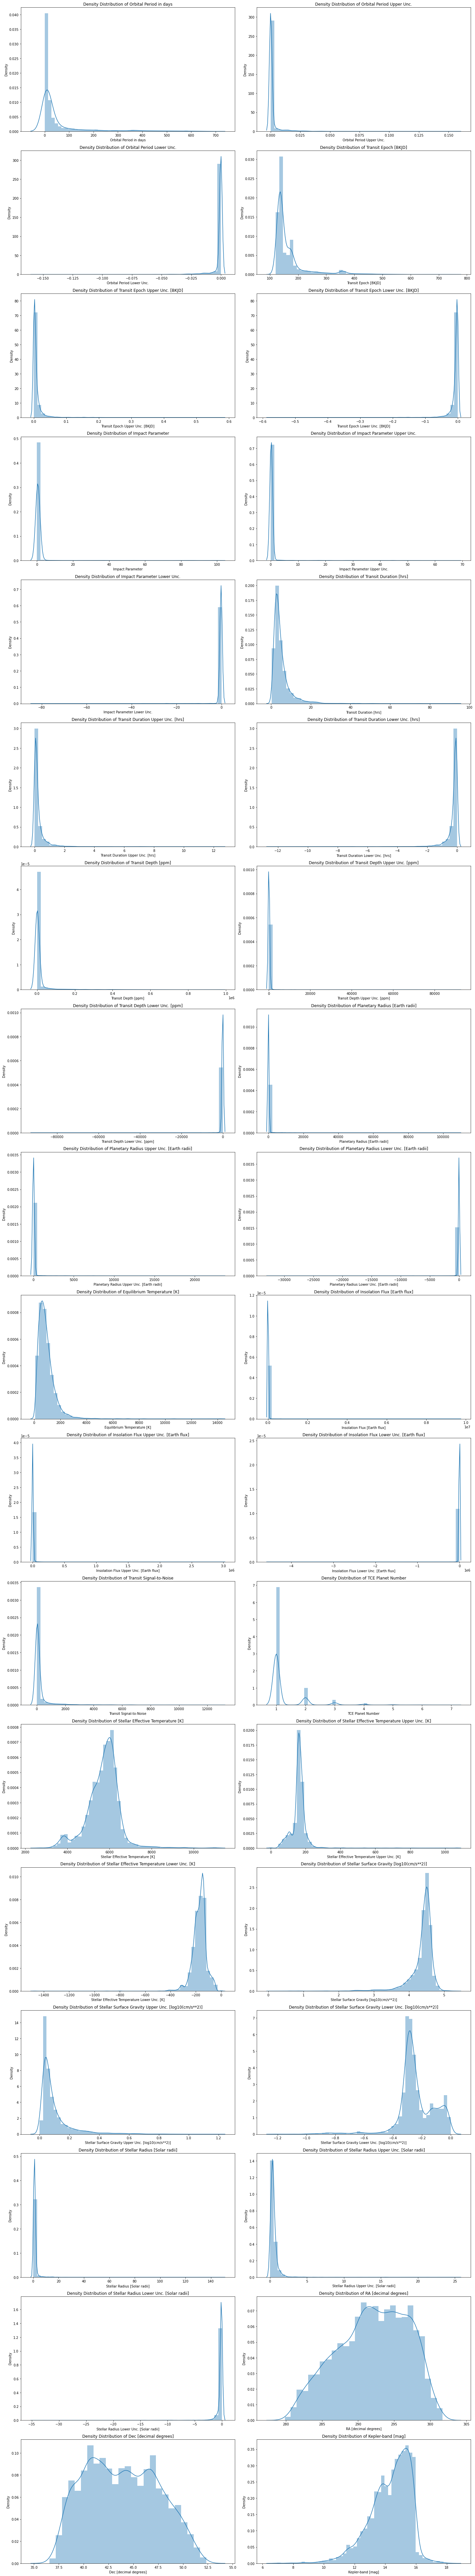

In [20]:
#Selecting numerical columns
columns = ["Orbital Period in days", 
                    "Orbital Period Upper Unc.", 
                    "Orbital Period Lower Unc.", 
                    "Transit Epoch [BKJD]", 
                    "Transit Epoch Upper Unc. [BKJD]", 
                    "Transit Epoch Lower Unc. [BKJD]", 
                    "Impact Parameter", 
                    "Impact Parameter Upper Unc.", 
                    "Impact Parameter Lower Unc.", 
                    "Transit Duration [hrs]", 
                    "Transit Duration Upper Unc. [hrs]", 
                    "Transit Duration Lower Unc. [hrs]", 
                    "Transit Depth [ppm]", 
                    "Transit Depth Upper Unc. [ppm]", 
                    "Transit Depth Lower Unc. [ppm]", 
                    "Planetary Radius [Earth radii]",
                    "Planetary Radius Upper Unc. [Earth radii]", 
                    "Planetary Radius Lower Unc. [Earth radii]", 
                    "Equilibrium Temperature [K]", 
                    "Insolation Flux [Earth flux]", 
                    "Insolation Flux Upper Unc. [Earth flux]", 
                    "Insolation Flux Lower Unc. [Earth flux]",
                    "Transit Signal-to-Noise", 
                    "TCE Planet Number", 
                    "Stellar Effective Temperature [K]", 
                    "Stellar Effective Temperature Upper Unc. [K]", 
                    "Stellar Effective Temperature Lower Unc. [K]", 
                    "Stellar Surface Gravity [log10(cm/s**2)]", 
                    "Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]", 
                    "Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]", 
                    "Stellar Radius [Solar radii]", 
                    "Stellar Radius Upper Unc. [Solar radii]", 
                    "Stellar Radius Lower Unc. [Solar radii]", 
                    "RA [decimal degrees]", 
                    "Dec [decimal degrees]", 
                    "Kepler-band [mag]"]

num_plots = len(columns)
rows = (num_plots // 2) + (num_plots % 2)
fig, axs = plt.subplots(rows, 2, figsize=(20, 6*rows))

for i, col in enumerate(columns):
    sns.distplot(exop[col], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Density Distribution of {}'.format(col))

# remove any unused subplots
if num_plots < rows*2:
    for ax in axs[-1]:
        ax.remove()
        
plt.tight_layout()
plt.show()

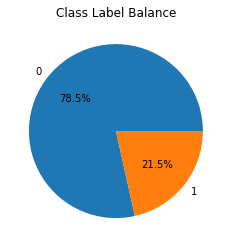

In [21]:
# Count the number of instances for each class label
class_counts = exop['Candidate ExopStatus'].value_counts()

# Create a pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Label Balance')
plt.show()

In [22]:
# Calculate the IQR for each column
q1 = exop[columns].quantile(0.25)
q3 = exop[columns].quantile(0.75)
iqr = q3 - q1

# Define the outlier threshold for each column
outlier_threshold = 1.5 * iqr

# Find the outliers for each column
outliers = ((exop[columns] < (q1 - outlier_threshold)) | (exop[columns] > (q3 + outlier_threshold)))

# Count the number of outliers for each column
num_outliers = outliers.sum()

# Print the number of outliers per column
print(num_outliers)

Orbital Period in days                                  936
Orbital Period Upper Unc.                              1019
Orbital Period Lower Unc.                              1019
Transit Epoch [BKJD]                                    618
Transit Epoch Upper Unc. [BKJD]                         564
Transit Epoch Lower Unc. [BKJD]                         564
Impact Parameter                                        179
Impact Parameter Upper Unc.                             139
Impact Parameter Lower Unc.                             110
Transit Duration [hrs]                                  472
Transit Duration Upper Unc. [hrs]                       645
Transit Duration Lower Unc. [hrs]                       645
Transit Depth [ppm]                                    1084
Transit Depth Upper Unc. [ppm]                          643
Transit Depth Lower Unc. [ppm]                          643
Planetary Radius [Earth radii]                         1174
Planetary Radius Upper Unc. [Earth radii

In [23]:
# Calculate the IQR for each column
q1 = exop[columns].quantile(0.25)
q3 = exop[columns].quantile(0.75)
iqr = q3 - q1

# Define the outlier threshold for each column
outlier_threshold = 1.5 * iqr

# Find the outliers for each column
outliers = ((exop[columns] < (q1 - outlier_threshold)) | (exop[columns] > (q3 + outlier_threshold)))

# Count the number of outliers for each column
num_outliers = outliers.sum()

# Calculate the percentage of outliers for each column
percent_outliers = (num_outliers / len(exop)) * 100

# Print the percentage of outliers per column
print("Percentage of outliers per column:")
print(percent_outliers)

Percentage of outliers per column:
Orbital Period in days                                 15.412481
Orbital Period Upper Unc.                              16.779187
Orbital Period Lower Unc.                              16.779187
Transit Epoch [BKJD]                                   10.176190
Transit Epoch Upper Unc. [BKJD]                         9.287008
Transit Epoch Lower Unc. [BKJD]                         9.287008
Impact Parameter                                        2.947472
Impact Parameter Upper Unc.                             2.288819
Impact Parameter Lower Unc.                             1.811296
Transit Duration [hrs]                                  7.772106
Transit Duration Upper Unc. [hrs]                      10.620781
Transit Duration Lower Unc. [hrs]                      10.620781
Transit Depth [ppm]                                    17.849498
Transit Depth Upper Unc. [ppm]                         10.587848
Transit Depth Lower Unc. [ppm]                         

In [24]:
# create a copy of the dataset to apply outlier removal
exop_copy = exop.copy()

# find the outliers for each column
outliers = {}
for column in columns:
    outliers[column] = exop_copy[(exop_copy[column] < (q1[column] - outlier_threshold[column])) | 
                                 (exop_copy[column] > (q3[column] + outlier_threshold[column]))][column].index.tolist()

# combine all outliers into a single list
all_outliers = set(outliers[columns[0]])
for column in columns[1:]:
    all_outliers = all_outliers.union(set(outliers[column]))

# calculate the percentage of outliers
percentage_outliers = (len(all_outliers) / len(exop)) * 100

print(f"Percentage of total instances represented as outliers: {percentage_outliers:.2f}%")

Percentage of total instances represented as outliers: 74.81%


In [25]:
# Compute the 10th and 90th percentiles for each column
q10 = exop_copy.quantile(0.1)
q90 = exop_copy.quantile(0.9)

# Replace values below 10th percentile with 10th percentile value
# Replace values above 90th percentile with 90th percentile value
exop_copy = exop_copy.clip(lower=q10, upper=q90, axis=1)


In [26]:
# Calculate the IQR for each column
q1 = exop_copy[columns].quantile(0.25)
q3 = exop_copy[columns].quantile(0.75)
iqr = q3 - q1

# Define the outlier threshold for each column
outlier_threshold = 1.5 * iqr

# Find the outliers for each column
outliers = ((exop_copy[columns] < (q1 - outlier_threshold)) | (exop_copy[columns] > (q3 + outlier_threshold)))

# Count the number of outliers for each column
num_outliers = outliers.sum()

# Calculate the percentage of outliers for each column
percent_outliers = (num_outliers / len(exop_copy)) * 100

# Print the percentage of outliers per column
print("Percentage of outliers per column:")
print(percent_outliers)

Percentage of outliers per column:
Orbital Period in days                                 15.412481
Orbital Period Upper Unc.                              16.779187
Orbital Period Lower Unc.                              16.779187
Transit Epoch [BKJD]                                   10.176190
Transit Epoch Upper Unc. [BKJD]                         0.000000
Transit Epoch Lower Unc. [BKJD]                         0.000000
Impact Parameter                                        0.000000
Impact Parameter Upper Unc.                             0.000000
Impact Parameter Lower Unc.                             0.000000
Transit Duration [hrs]                                  0.000000
Transit Duration Upper Unc. [hrs]                      10.620781
Transit Duration Lower Unc. [hrs]                      10.620781
Transit Depth [ppm]                                    17.849498
Transit Depth Upper Unc. [ppm]                         10.587848
Transit Depth Lower Unc. [ppm]                         

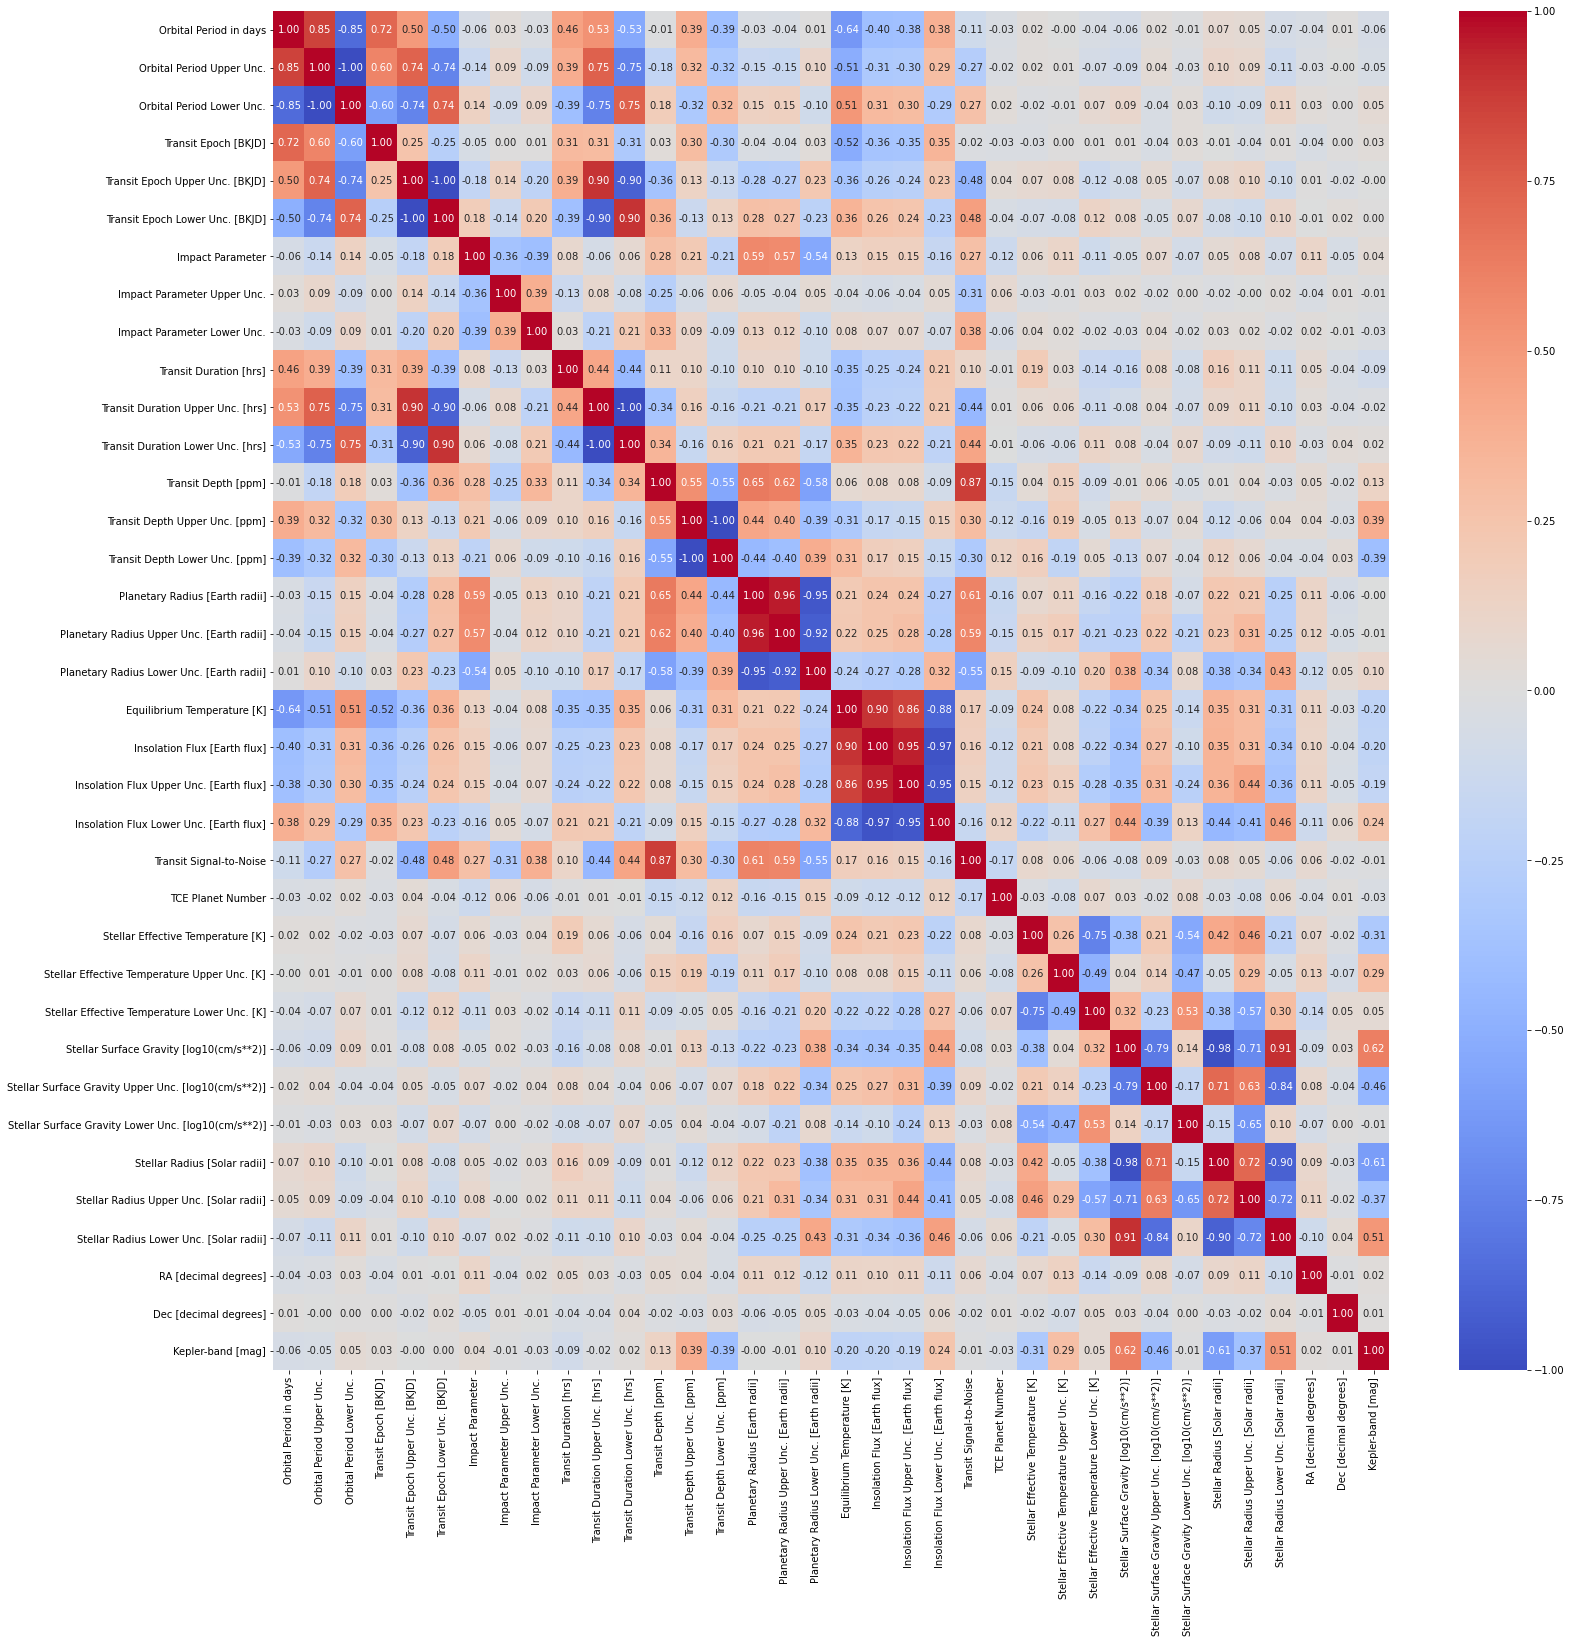

In [27]:
# Create the correlation matrix
corr_matrix = exop_copy[columns].corr()

# Set the figure size
plt.figure(figsize=(25, 25))

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [28]:
# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column].abs() > 0.7)]

# Print the highly correlated features
print("Highly correlated features:")
for feature in high_corr_features:
    print(feature)

Highly correlated features:
Orbital Period Upper Unc.
Orbital Period Lower Unc.
Transit Epoch [BKJD]
Transit Epoch Upper Unc. [BKJD]
Transit Epoch Lower Unc. [BKJD]
Transit Duration Upper Unc. [hrs]
Transit Duration Lower Unc. [hrs]
Transit Depth Lower Unc. [ppm]
Planetary Radius Upper Unc. [Earth radii]
Planetary Radius Lower Unc. [Earth radii]
Insolation Flux [Earth flux]
Insolation Flux Upper Unc. [Earth flux]
Insolation Flux Lower Unc. [Earth flux]
Transit Signal-to-Noise
Stellar Effective Temperature Lower Unc. [K]
Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
Stellar Radius [Solar radii]
Stellar Radius Upper Unc. [Solar radii]
Stellar Radius Lower Unc. [Solar radii]


In [29]:
# Get the absolute correlation values for all features with the class label

corr_matrix2 = exop_copy.corr()

class_corr = abs(corr_matrix2['Candidate ExopStatus'])

# Get the features highly correlated with the class label
high_corr_feats = class_corr[class_corr > 0.1].sort_values(ascending=False)
print("Highly correlated features with the class label:")
print(high_corr_feats)

# Get the least correlated features with the class label
least_corr_feats = class_corr[class_corr < 0.1].sort_values(ascending=True)
print("\nLeast correlated features with the class label:")
print(least_corr_feats)

Highly correlated features with the class label:
Candidate ExopStatus                       1.000000
Orbital Period in days                     0.392983
Equilibrium Temperature [K]                0.344725
Orbital Period Lower Unc.                  0.287628
Orbital Period Upper Unc.                  0.287628
Transit Epoch [BKJD]                       0.267707
Insolation Flux [Earth flux]               0.235846
Transit Duration [hrs]                     0.233438
Insolation Flux Upper Unc. [Earth flux]    0.227940
Insolation Flux Lower Unc. [Earth flux]    0.220015
Transit Epoch Upper Unc. [BKJD]            0.186452
Transit Epoch Lower Unc. [BKJD]            0.186452
Transit Duration Upper Unc. [hrs]          0.159841
Transit Duration Lower Unc. [hrs]          0.159841
Transit Depth Lower Unc. [ppm]             0.128139
Transit Depth Upper Unc. [ppm]             0.128139
TCE Planet Number                          0.111760
Name: Candidate ExopStatus, dtype: float64

Least correlated featur

In [30]:
# define the feature and target variable
X = exop_copy.drop(['Candidate ExopStatus'], axis=1)
y = exop_copy['Candidate ExopStatus']


In [31]:
# drop the highly correlated features from the X dataset
X = X.drop(high_corr_features, axis=1)

In [73]:
print("Number of rows:", X.shape[0])
print("Number of columns:", X.shape[1])

Number of rows: 6073
Number of columns: 21


In [32]:
#Scaling the dataset

# make a copy of X and y
X_pr = X.copy()
y_pr = y.copy()

scaler = StandardScaler()
X_pr = scaler.fit_transform(X_pr)

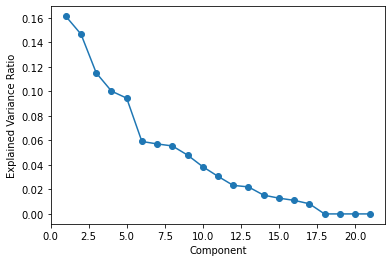

In [33]:
# create a PCA object with n_components=None
pca = PCA(n_components=None)

# fit the PCA model on the data
pca.fit(X_pr)

# plot the explained variance ratio for each component
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [34]:
# instantiate PCA
pca = PCA(n_components=5)

# fit and transform PCA on X_pr
X_pr = pca.fit_transform(X_pr)

In [35]:
#Resample the data to balance the class label

smote = SMOTE(random_state=42)
X_pr, y_pr = smote.fit_resample(X_pr, y_pr)

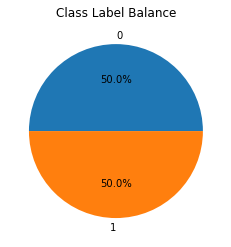

In [36]:
# Count the number of instances for each class label
class_smote = y_pr.value_counts()

# Create a pie chart
plt.pie(class_smote, labels=class_smote.index, autopct='%1.1f%%')
plt.title('Class Label Balance')
plt.show()

In [37]:
print(X_pr.shape)
print(y_pr.shape)

(9534, 5)
(9534,)


In [38]:
# create k-fold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# create models
svm_model = SVC()
dt_model = DecisionTreeClassifier()
nn_model = MLPClassifier()

# create a list of models and their names
models = [("SVM", svm_model), ("Decision Tree", dt_model), ("Neural Network", nn_model)]

# iterate through the list of models and evaluate each model using cross-validation
for model_name, model in models:
    # compute cross-validation scores
    scores = cross_validate(model, X_pr, y_pr, cv=kf, scoring=["accuracy", "precision", "f1", "recall"])
    
    # print the results
    print(f"{model_name} Results:")
    print(f"Accuracy: {scores['test_accuracy'].mean():.3f} (+/- {scores['test_accuracy'].std():.3f})")
    print(f"Precision: {scores['test_precision'].mean():.3f} (+/- {scores['test_precision'].std():.3f})")
    print(f"F1-Score: {scores['test_f1'].mean():.3f} (+/- {scores['test_f1'].std():.3f})")
    print(f"Recall: {scores['test_recall'].mean():.3f} (+/- {scores['test_recall'].std():.3f})")

SVM Results:
Accuracy: 0.748 (+/- 0.011)
Precision: 0.749 (+/- 0.013)
F1-Score: 0.748 (+/- 0.014)
Recall: 0.747 (+/- 0.018)
Decision Tree Results:
Accuracy: 0.783 (+/- 0.016)
Precision: 0.765 (+/- 0.013)
F1-Score: 0.790 (+/- 0.018)
Recall: 0.818 (+/- 0.028)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

Neural Network Results:
Accuracy: 0.754 (+/- 0.015)
Precision: 0.742 (+/- 0.016)
F1-Score: 0.759 (+/- 0.017)
Recall: 0.779 (+/- 0.029)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

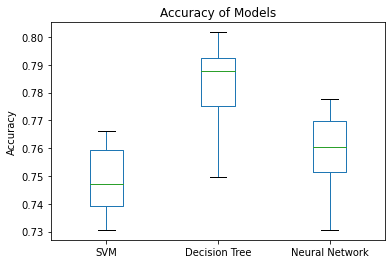

In [74]:
# create a list of models and their names
models = [("SVM", svm_model), ("Decision Tree", dt_model), ("Neural Network", nn_model)]

# create a list to store the cross-validation scores for each model
scores_list = []

# iterate through the list of models and evaluate each model using cross-validation
for model_name, model in models:
    # compute cross-validation scores
    scores = cross_validate(model, X_pr, y_pr, cv=kf, scoring=["accuracy"])
    scores_list.append(scores['test_accuracy'])

# create a dataframe from the scores list
df = pd.DataFrame(scores_list, index=[model_name for model_name, model in models]).T

# plot a boxplot to visualize the accuracy of the models
fig, ax = plt.subplots()
df.plot(kind='box', ax=ax)
ax.set_title('Accuracy of Models')
ax.set_ylabel('Accuracy')
plt.show()

In [40]:
#Define the hyperparameters and their ranges to search over
svm_param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.01, 0.1, 1]
}
dt_param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
nn_param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (200,), (50,50), (100,50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01]
}

#Define a list of models and their corresponding hyperparameter grids
models = [
    ("SVM", svm_model, svm_param_grid),
    ("Decision Tree", dt_model, dt_param_grid),
    ("Neural Network", nn_model, nn_param_grid)
]

# Iterate through the list of models and perform GridSearchCV
for model_name, model, param_grid in models:
    # Perform GridSearchCV
    grid_search = GridSearchCV(
    model, param_grid, cv=5, n_jobs=-1, scoring=["accuracy", "precision", "f1", "recall"], refit="accuracy"
)
    grid_search.fit(X_pr, y_pr)
    
    # Print the best hyperparameters and performance metrics
    print(f"{model_name} Results:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Accuracy: {grid_search.best_score_:.3f}\n")

SVM Results:
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 0.852

Decision Tree Results:
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.765

Neural Network Results:
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Best Accuracy: 0.776



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


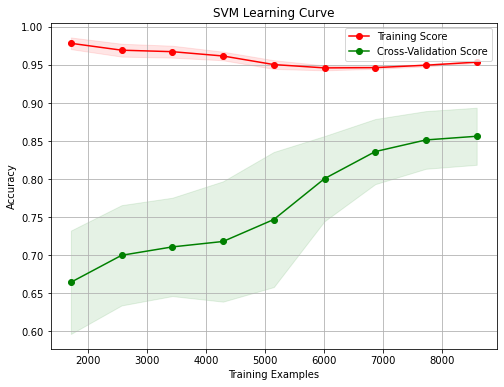

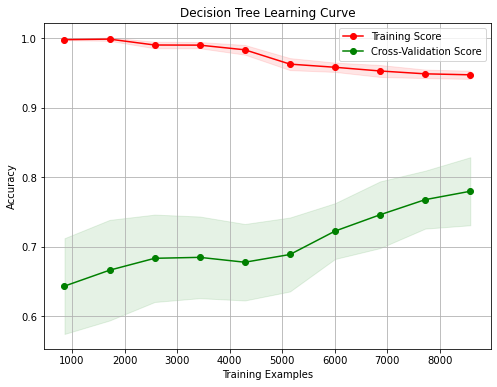

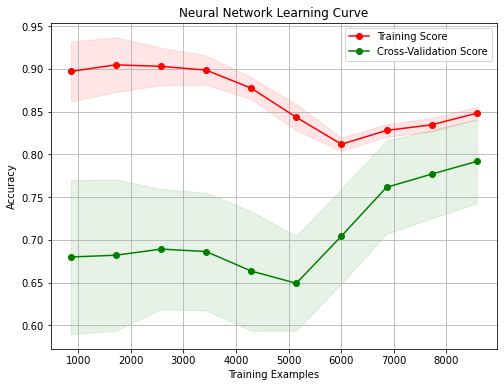

In [48]:
#Define models with best hyperparameters obtained from GridSearch
svm_model_ = SVC(C=10, gamma=1, kernel="rbf")
dt_model_ = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2)
nn_model_ = MLPClassifier(activation="tanh", alpha=0.0001, hidden_layer_sizes=(100, 50))

# Create a list of models 
models = [("SVM", svm_model_), ("Decision Tree", dt_model_), ("Neural Network", nn_model_)]

# plot the learning curve for each model
for model_name, model in models:
    # compute the learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_pr, y_pr, cv=10, n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring="accuracy")
    # calculate the mean and standard deviation of the training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{model_name} Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, "o-", color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, "o-", color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()

In [64]:
#Create model

# split the dataset into training and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X.shape,X_train.shape)

(6073, 21) (4858, 21)


In [65]:
#Scaling the dataset 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Use PCA to reduce the dimensionality of the training data
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [67]:
# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [68]:
svm_model_op = SVC(C=100, gamma=1, kernel="rbf")
dt_model_op = DecisionTreeClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2)
nn_model_op = MLPClassifier(activation="tanh", alpha=0.0001, hidden_layer_sizes=(100, 50))


# fit the models to the data
svm_model_op.fit(X_train, y_train)
nn_model_op.fit(X_train, y_train)
dt_model_op.fit(X_train, y_train)

# make predictions on the test data
svm_pred = svm_model_op.predict(X_test)
nn_pred = nn_model_op.predict(X_test)
dt_pred = dt_model_op.predict(X_test)

# evaluate the model performance
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# print the evaluation metrics
print("SVM Evaluation Metrics:")
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1-score: ", svm_f1)

print("Neural Network Evaluation Metrics:")
print("Accuracy: ", nn_accuracy)
print("Precision: ", nn_precision)
print("Recall: ", nn_recall)
print("F1-score: ", nn_f1)

print("Decision Tree Evaluation Metrics:")
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1-score: ", dt_f1)

# calculate the confusion matrix for each model
svm_cm = confusion_matrix(y_test, svm_pred)
nn_cm = confusion_matrix(y_test, nn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

# print the confusion matrices
print("SVM Confusion Matrix:")
print(svm_cm)

print("Neural Network Confusion Matrix:")
print(nn_cm)

print("Decision Tree Confusion Matrix:")
print(dt_cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM Evaluation Metrics:
Accuracy:  0.7522633744855967
Precision:  0.43006993006993005
Recall:  0.47126436781609193
F1-score:  0.44972577696526506
Neural Network Evaluation Metrics:
Accuracy:  0.7349794238683127
Precision:  0.4246913580246914
Recall:  0.6590038314176245
F1-score:  0.5165165165165165
Decision Tree Evaluation Metrics:
Accuracy:  0.6987654320987654
Precision:  0.3657289002557545
Recall:  0.5478927203065134
F1-score:  0.4386503067484663
SVM Confusion Matrix:
[[791 163]
 [138 123]]
Neural Network Confusion Matrix:
[[721 233]
 [ 89 172]]
Decision Tree Confusion Matrix:
[[706 248]
 [118 143]]


In [69]:
#Setting the model hyperparameters 
model = Sequential()
model.add(Dense(units=100, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model performance
nn_pred = model.predict(X_test)
nn_pred = np.argmax(nn_pred, axis=1)
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)

# print the evaluation metrics
print("Neural Network Evaluation Metrics:")
print("Accuracy: ", nn_accuracy)
print("Precision: ", nn_precision)
print("Recall: ", nn_recall)
print("F1-score: ", nn_f1)

# Calculate the confusion matrix
nn_cm = confusion_matrix(y_test, nn_pred)

# print the confusion matrix
print("Neural Network Confusion Matrix:")
print(nn_cm)

Epoch 1/50
239/239 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7288 - val_loss: 0.5629 - val_accuracy: 0.7292
Epoch 2/50
239/239 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7325 - val_loss: 0.5659 - val_accuracy: 0.7218
Epoch 3/50
239/239 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7394 - val_loss: 0.5620 - val_accuracy: 0.7251
Epoch 4/50
239/239 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7429 - val_loss: 0.5606 - val_accuracy: 0.7185
Epoch 5/50
239/239 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7426 - val_loss: 0.5821 - val_accuracy: 0.7202
Epoch 6/50
239/239 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7422 - val_loss: 0.5494 - val_accuracy: 0.7292
Epoch 7/50
239/239 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7460 - val_loss: 0.5718 - val_accuracy: 0.7086
Epoch 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

#print the test set loss and accuracy
print("Test set Loss: ", test_loss)
print("Test set Accuracy: ", test_accuracy)

38/38 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7202
Test set Loss:  0.5472056865692139
Test set Accuracy:  0.7201645970344543
